#**Estimating the min sample size needed using Power analysis**
Last edited: 2020-06-24 |[ Limor Goldhaber ](https://www.linkedin.com/in/limorgoldhaber/))

##**What is Statistical Power?**
In Hypothesis testing, statistical Power is the probability finding an effect if there is an effect to be found (if an effect actually exists). It can also be used as a tool to estimate the number of observations or sample size required in order to detect an effect in an experiment.


##**What is a Power Analysis?**
**A Power Analysis** can be used to estimate the minimum sample size required for an experiment, given the desired significance level, effect size and statistical power.

We'll usually define:

*   Significance level (α) = 0.05 (95% confidence)
*   Statistical Power = 0.8 (80%)
*   Effect size (based on Choen's d measure) = 0.8 for large effect size, medium effect size = 0.5, small effect size = 0.2 (read more on calculating effect size [here](https://machinelearningmastery.com/effect-size-measures-in-python/).

<br>
The test is often interpreted using a **p-value**, which is the probability of observing the result given that the null hypothesis is true.

In interpreting the p-value of a significance test, you must specify a significance level. A result of a significance test is claimed to be “statistically significant” if the p-value is less than the significance level. This means that the null hypothesis (that there is no difference) is rejected.

* **p <= alpha**: reject H0, different distribution
* **p > alpha**: fail to reject H0, same distribution



## **Calculating a power analysis**

###**Terminology**

#####**Independent sample test (or two-sample t-test)**

An inferential statistical test that determines whether there is a statistically significant difference between the means in two *unrelated* groups.
<br>The null hypothesis for the independent t-test is that the population means from the two unrelated groups are equal:


> H0: u1 = u2


<br> The alternative hypothesis in such case would be if the population means are not equal:
> HA: u1 ≠ u2

<br>**What are unrelated groups?**
Unrelated groups are groups in which the users in each group are different. Often we are investigating differences in individuals, which means that when comparing two groups, an individual in one group cannot also be a member of the other group and vice versa.



#####**Paired sample test**

A paired t-test is used to compare two population means where you have two samples in which observations in one sample can be paired with observations in the other sample. Examples of where this might occur are:

* Before-and-after observations on the same subjects.
* A comparison of two different methods of measurement or two different treatments where the measurements/treatments are applied to the same subjects.

The null hypothesis for a paired sample t-test is that the mean difference between two sets of observations (groups) is zero.


### **Plotting the min sample size needed for detecting different effect sizes**

In [ ]:
# based on the type of test use the following functions:
# if independent sample t-test: TTestIndPower()
# if paired sample t-test: TTestPower()

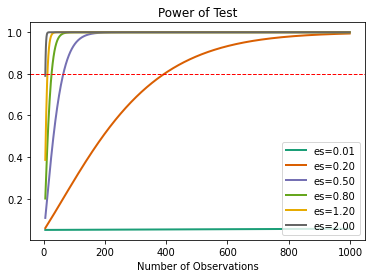

In [ ]:
# calculate power curves for varying sample and effect size
from numpy import array
from matplotlib import pyplot
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis
effect_sizes = array([0.01,0.2, 0.5,0.8,1.20,2])                  # define the range of desired effect size or use full range
sample_sizes = array(range(5,1000))                               # define the sample size range you wish to explore

# calculate power curves from multiple power analyses
analysis = TTestIndPower()                                        # change to TTestPower() in case of a paired sample t-test
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
pyplot.axhline(y=0.8, color='r', linestyle='dashed', linewidth=1) # adds horizontal line at power = 0.8
pyplot.show()


###**Min Sample size caluclation given an effect size, power and significance level**

In [ ]:
# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower

# parameters for power analysis (change as needed)
effect = 0.05
alpha = 0.05
power = 0.8

# perform power analysis
analysis = TTestIndPower()  # change to TTestPower() in case of a paired sample t-test
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha)

    # nobs1 = sample size, number of observations. This is what we're looking to find
    # ratio = If both samples are expected to have the same number of observations, then the ratio is 1.0.
    #         If, for example, the second sample is expected to have half as many observations, then the ratio would be 0.5

print('Sample Size: %.0f' % result)

Sample Size: 6280
